In [2]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("imdb")

ds = load_dataset("open-web-math/open-web-math")


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset

# Load only a specific split (e.g., "train")
dataset = load_dataset("dataset_name", split="train[:5%]")  # Load the first 5% of the training set


datasets.dataset_dict.DatasetDict

In [16]:
print(dataset["train"].num_rows)

25000


In [17]:
train_data = dataset["train"]

In [29]:
import torch


train_data[24000]

{'text': "S.S. Van Dine must have been a shrewd businessman in dealing with Hollywood. Most of the film series' from the studio days were usually confined to one or two studios. But apparently Van Dine must have sold his rights to each book about Philo Vance one at a time. Note that Paramount, MGM, Warner Brothers, and more all released Philo Vance films. Only Tarzan seemed to get around Hollywood more.<br /><br />MGM produced the Garden Murder Case and starred Edmund Lowe as the fashionable detective. Of course MGM had the screen's original Philo under contract at the time, but Bill Powell was busy doing The Thin Man at the time and I guess Louis B. Mayer decided to concentrate him there.<br /><br />Edmund Lowe is a pretty acceptable Philo Vance. Lowe had started out pretty big at the tail end of the silent era with What Price Glory and then with a string of films with Victor McLaglen with their Flagg and Quirt characters. But after McLaglen got his Oscar for The Informer, Lowe seemed

In [49]:
import pandas as pd

train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

train_df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [37]:
from collections import Counter

# Count label distribution in the train split
label_counts = Counter(train_data["label"])
print(f"Label Distribution: {label_counts}")


Label Distribution: Counter({0: 12500, 1: 12500})


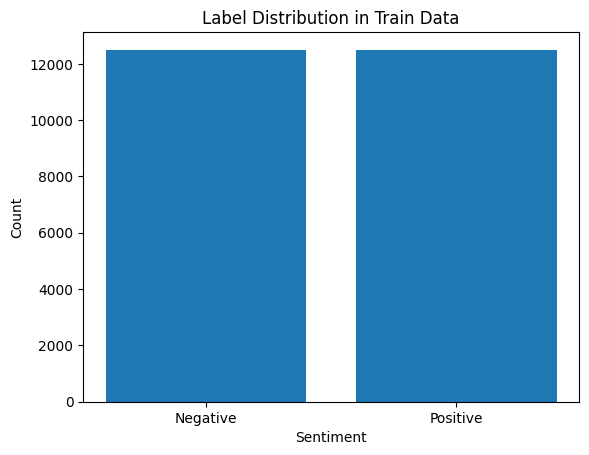

In [39]:
import matplotlib.pyplot as plt

# Plot label distribution
labels = ["Negative", "Positive"]
counts = [label_counts[0], label_counts[1]]

plt.bar(labels, counts)
plt.title("Label Distribution in Train Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [40]:
# Compute lengths of reviews
text_lengths = [len(text.split()) for text in train_data["text"]]

# Summary statistics
print(f"Average review length: {sum(text_lengths) / len(text_lengths):.2f} words")
print(f"Max review length: {max(text_lengths)} words")
print(f"Min review length: {min(text_lengths)} words")


Average review length: 233.79 words
Max review length: 2470 words
Min review length: 10 words


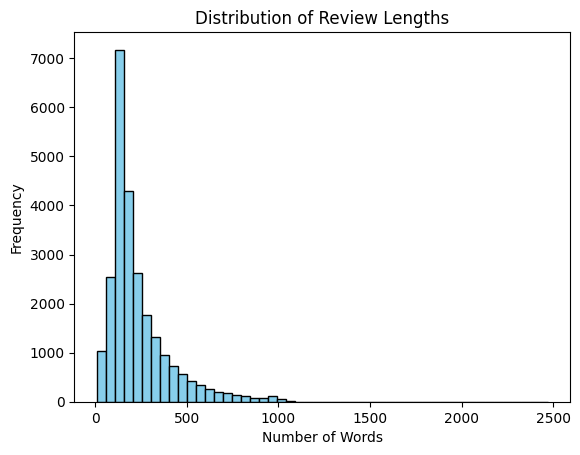

In [41]:
# Plot histogram of text lengths
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [43]:
from collections import Counter
import re

# Tokenize text
all_words = []
for text in train_data["text"]:
    all_words.extend(re.findall(r'\w+', text.lower()))

# Count word frequencies
word_counts = Counter(all_words)
print(word_counts.most_common(20))


[('the', 336749), ('and', 164140), ('a', 163123), ('of', 145864), ('to', 135724), ('is', 107332), ('br', 101871), ('it', 96467), ('in', 93976), ('i', 87690), ('this', 76007), ('that', 73286), ('s', 63602), ('was', 48209), ('as', 46935), ('for', 44345), ('with', 44130), ('movie', 44047), ('but', 42623), ('film', 40159)]


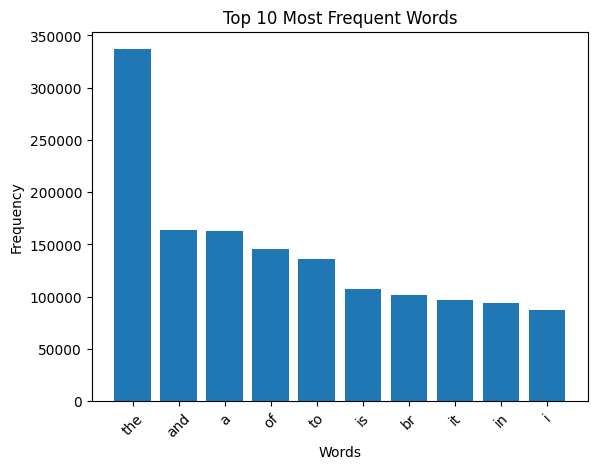

In [44]:
# Top 10 words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

# Plot
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [45]:
positive_words = []
negative_words = []

for text, label in zip(train_data["text"], train_data["label"]):
    tokens = re.findall(r'\w+', text.lower())
    if label == 1:  # Positive
        positive_words.extend(tokens)
    else:  # Negative
        negative_words.extend(tokens)

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)



In [46]:

# Top 10 words for each sentiment
print("Positive Sentiment Words:", positive_word_counts.most_common(10))
print("Negative Sentiment Words:", negative_word_counts.most_common(10))


Positive Sentiment Words: [('the', 173344), ('and', 89747), ('a', 83723), ('of', 76855), ('to', 66749), ('is', 57247), ('in', 50221), ('br', 49235), ('it', 48074), ('i', 40774)]
Negative Sentiment Words: [('the', 163405), ('a', 79400), ('and', 74393), ('of', 69009), ('to', 68975), ('br', 52636), ('is', 50085), ('it', 48393), ('i', 46916), ('in', 43755)]


In [47]:
# Compute average review length by sentiment
positive_lengths = [len(text.split()) for text, label in zip(train_data["text"], train_data["label"]) if label == 1]
negative_lengths = [len(text.split()) for text, label in zip(train_data["text"], train_data["label"]) if label == 0]

print(f"Average length of positive reviews: {sum(positive_lengths) / len(positive_lengths):.2f} words")
print(f"Average length of negative reviews: {sum(negative_lengths) / len(negative_lengths):.2f} words")


Average length of positive reviews: 236.71 words
Average length of negative reviews: 230.87 words


In [48]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    return text

cleaned_texts = [preprocess_text(text) for text in train_data["text"]]
print(cleaned_texts[:5])



['i rented i am curiousyellow from my video store because of all the controversy that surrounded it when it was first released in 1967 i also heard that at first it was seized by us customs if it ever tried to enter this country therefore being a fan of films considered controversial i really had to see this for myselfbr br the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states in between asking politicians and ordinary denizens of stockholm about their opinions on politics she has sex with her drama teacher classmates and married menbr br what kills me about i am curiousyellow is that 40 years ago this was considered pornographic really the sex and nudity scenes are few and far between even then its not shot like some